In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt # this is for showing images

In [2]:
data = pd.read_csv("train.csv")

In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
y_dev = data_dev[0]
x_dev = data_dev[1:n]
x_dev = x_dev / 255.

data_train = data[1000:m].T
y_train = data_train[0]
x_train = data_train[1:n]
x_train = x_train / 255.
_,m_train = x_train.shape

In [5]:
y_train

array([7, 6, 9, ..., 0, 0, 2])

In [6]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, x):
    Z1 = W1.dot(x) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(y):
    one_hot_y = np.zeros((y.size, y.max() + 1))
    one_hot_y[np.arange(y.size), y] = 1
    one_hot_y = one_hot_y.T
    return one_hot_y

def backward_prop(Z1, A1, Z2, A2, W1, W2, x, y):
    one_hot_y = one_hot(y)
    dZ2 = A2 - one_hot_y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(x.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [7]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, y):
    print(predictions, y)
    return np.sum(predictions == y) / y.size

def gradient_descent(x, y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, x)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, x, y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, y))
    return W1, b1, W2, b2

In [13]:
W1, b1, W2, b2 = gradient_descent(x_train, y_train, 0.15, 600)

Iteration:  0
[0 1 0 ... 1 1 1] [7 6 9 ... 0 0 2]
0.07248780487804878
Iteration:  10
[7 2 7 ... 2 8 2] [7 6 9 ... 0 0 2]
0.2465609756097561
Iteration:  20
[7 3 7 ... 2 3 2] [7 6 9 ... 0 0 2]
0.31890243902439025
Iteration:  30
[7 3 7 ... 3 3 2] [7 6 9 ... 0 0 2]
0.376390243902439
Iteration:  40
[7 3 7 ... 3 3 2] [7 6 9 ... 0 0 2]
0.4261219512195122
Iteration:  50
[7 3 7 ... 3 3 2] [7 6 9 ... 0 0 2]
0.47924390243902437
Iteration:  60
[7 3 0 ... 3 0 2] [7 6 9 ... 0 0 2]
0.5378780487804878
Iteration:  70
[7 3 0 ... 3 0 2] [7 6 9 ... 0 0 2]
0.594609756097561
Iteration:  80
[7 0 0 ... 3 0 2] [7 6 9 ... 0 0 2]
0.6371463414634146
Iteration:  90
[7 0 9 ... 3 0 2] [7 6 9 ... 0 0 2]
0.67
Iteration:  100
[7 0 9 ... 0 5 2] [7 6 9 ... 0 0 2]
0.6943658536585365
Iteration:  110
[7 0 9 ... 0 5 2] [7 6 9 ... 0 0 2]
0.7145853658536585
Iteration:  120
[7 0 9 ... 0 5 2] [7 6 9 ... 0 0 2]
0.7299268292682927
Iteration:  130
[7 0 9 ... 0 5 2] [7 6 9 ... 0 0 2]
0.741609756097561
Iteration:  140
[7 0 9 ... 0 5 

In [14]:
def make_predictions(x, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, x)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = x_train[:, index, None]
    prediction = make_predictions(x_train[:, index, None], W1, b1, W2, b2)
    label = y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [7]
Label:  7


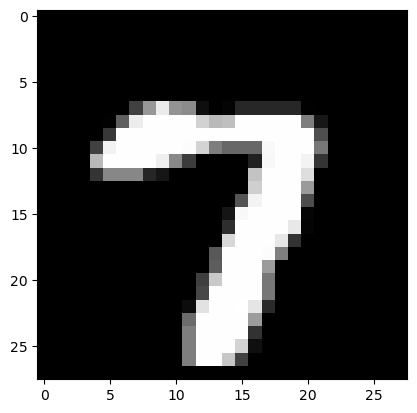

Prediction:  [6]
Label:  6


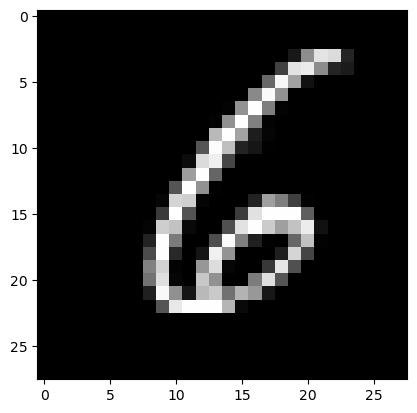

Prediction:  [9]
Label:  9


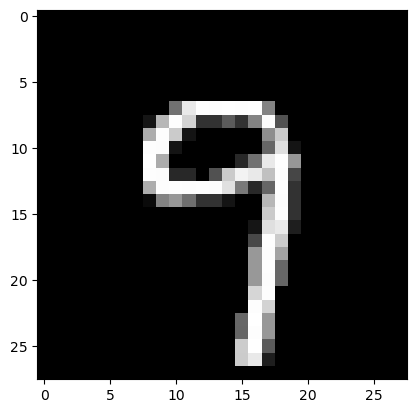

Prediction:  [9]
Label:  9


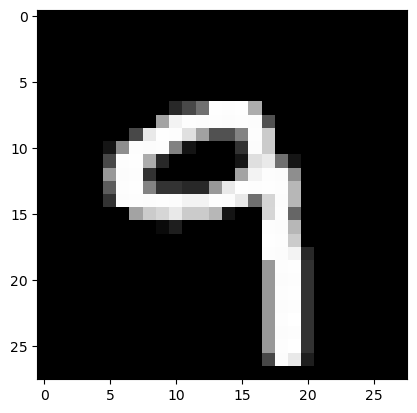

In [15]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [16]:
dev_predictions = make_predictions(x_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, y_dev)

[7 7 9 7 1 3 8 0 4 5 0 9 0 2 4 7 8 0 4 2 1 2 2 1 7 5 9 4 3 3 9 9 3 0 1 7 1
 0 4 3 5 5 9 0 6 3 9 8 8 8 6 9 8 7 9 4 4 3 3 3 6 9 8 9 1 0 6 3 8 7 1 1 8 8
 7 1 2 1 0 7 5 3 3 3 7 7 7 1 1 3 8 3 5 9 1 8 0 7 7 4 1 7 5 0 7 6 2 4 1 4 4
 3 1 0 1 4 2 7 6 3 3 7 4 5 3 3 7 8 1 0 3 5 9 0 0 9 1 5 8 1 3 2 5 5 1 9 4 0
 1 7 7 5 1 5 7 6 1 7 3 6 3 5 4 2 0 3 0 6 0 5 3 6 2 4 1 9 7 3 7 1 6 3 9 8 4
 2 9 0 4 6 2 0 6 8 5 8 3 1 0 2 0 8 0 6 8 4 1 5 8 6 4 0 2 7 9 7 1 3 7 0 2 3
 7 7 2 1 1 9 2 2 3 0 0 7 6 9 2 4 5 0 9 8 7 2 9 5 9 5 1 6 4 3 9 9 9 1 7 0 2
 9 0 4 7 7 4 8 3 3 6 8 3 9 7 1 5 8 2 0 0 9 2 7 7 1 6 8 8 6 6 7 0 2 6 2 6 5
 3 2 0 3 9 3 0 5 1 7 7 6 6 9 1 1 0 2 5 7 8 2 0 0 4 7 0 9 6 0 0 5 6 1 6 5 6
 9 8 9 0 2 0 3 9 4 7 2 5 8 6 5 1 0 2 1 2 6 4 1 6 8 9 4 0 6 6 6 5 0 8 6 3 4
 8 0 7 0 9 6 1 3 2 3 9 9 3 8 5 8 0 4 9 5 0 5 2 0 1 0 4 6 2 3 0 7 2 4 4 8 3
 0 2 4 1 1 7 0 6 2 3 9 4 0 6 1 8 9 6 3 8 1 6 3 8 2 0 8 9 1 4 8 7 9 4 2 7 9
 7 6 1 2 7 6 9 9 4 9 2 6 7 0 5 1 8 7 4 1 3 4 4 5 4 3 8 7 7 9 4 6 7 5 4 8 8
 8 9 6 7 6 4 2 3 2 6 9 5 

0.871